<div align="center">
  <h1></h1>
  <img src="https://github.com/omotuno/HR-Analytics/blob/main/HR.png" alt="HR Project Image" width="400"/>
</div>



## Dataset Overview
#### The dataset comprises job details within the analytics industry, focusing on Hong Kong-based companies. It includes diverse job roles such as Data Scientist, Data Analyst, Business Intelligence, Machine Learning Engineer, and Data Engineer. The dataset is extensive, encompassing six separate datasets merged for comprehensive analysis.

<br>
<br>

| **Field**           | **Description**                                              |
|---------------------|--------------------------------------------------------------|
| Job Title           | Names of various job roles offered by companies.             |
| Company             | Names of companies providing different job roles.            |
| Salary              | Salary information for various job roles.                     |
| Job Description     | Detailed descriptions of job roles.                          |
| Career Level        | Categorization based on experience levels.                   |
| Qualification       | Educational qualifications required for jobs.                |
| Years of Experience  | Minimum experience required for various roles.               |
| Job Type            | Classification of jobs (full time, internship, part time, contract). |
| Company Website     | Links for job applications.                                  |
| Industry            | Domains to which job roles belong (Finance, HR, IT, etc.).   |
| Search Term         | Analytics domain classification (Data Science, Data Analytics, BI, ML, etc.). |
| Date Posted         | Date when a job was posted.                                  |
| Date Scrapped       | Date when the dataset was obtained.                          |


<br>
<br>
<br>


#### In this HR Analytics project, I plan to conduct an in-depth exploration of a comprehensive dataset containing job details from the analytics industry. This dataset encompasses a wide array of job roles, including Data Scientist, Data Analyst, Business Intelligence, Machine Learning Engineer, and Data Engineer, provided by various Hong Kong-based companies. My primary objective is to extract valuable insights that will empower HR departments to enhance their understanding and optimize the recruitment process. Through rigorous exploratory data analysis (EDA) and immersive visual analytics, I aim to unravel patterns in career levels, qualifications, job types, and industry distributions. The findings from this project will provide me with a profound understanding to inform strategic HR decision-making.



<br>

#### Importing libraries for visualization and analysis 

In [29]:

import pandas as pd
from pandas.plotting import table
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pymysql
import os 
from tabulate import tabulate

import warnings
from functools import reduce
warnings.filterwarnings("ignore")
pd.set_option('display.max_column', None)





### TO connect to mysql database you need to use your mysql or any other sql database credentials login or you can skip this step and just import the cleaned data directly as a csv file

In [3]:
# database mysql connection
dbcon = pymysql.connect(host="",user= "",password= "",database= "")

In [4]:
# Reading the data from mysql database
df=pd.read_sql_query("""select * from consolidated_search_ds;""", dbcon)

In [5]:
# First 5 rows of the data
df.head()

,Job Title,Company,Area,Employer Email,Employer Contact Number,Salary,Lower Salary Range,Upper Salary Range,Job Highlights,Job Description,Career Level,Qualification,Years of Experience,Job Type,Company Website,Job Link,Job Functions,Industry,Search Term,Date Posted,Date Scraped,Data Source,jobtick_avgsalary,jobtick_SQL,jobtick_Excel,jobtick_dashboard,jobtick_Python,jobtick_engineerjobs,jobtick_analystjobs,jobtick_scientistjobs
0,Business Analyst (Data Analysis),EC Healthcare,Not Specified,None,None,Not Specified,NaN,NaN,"['Develop and built segmentation platform', 'C...","['Job Descriptions:', 'Develop strategic KPIs ...",Entry,Not Specified,-1.0,"Full Time, Permanent",Not Specified,/hk/en/job/business-analyst-data-analysis-1000...,"Information Technology (IT), DBA, E-commerce, ...",Health & Beauty Care,Data Scientist,10-22-2021,22-10-2021,JobsDB,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN
1,Data Analyst Leader,A4lution Limited,Not Specified,None,['3955 8549'],Not Specified,NaN,NaN,"['Drive automation of analytical projects', 'I...","['Responsibilities:', 'Work closely with senio...",Senior,Degree,3.0,Full Time,Not Specified,/hk/en/job/data-analyst-leader-100003008838120,"Information Technology (IT), Data Scientist",Others,Data Scientist,10-22-2021,22-10-2021,JobsDB,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN
2,Data Analyst – Campaign Specialist,now TV,Not Specified,None,['2827 8322'],Not Specified,NaN,NaN,['Interpret & analyze data for campaign evalua...,"['The Job:', 'Hands on experience in conductin...",Entry,Degree,1.0,Full Time,http://www.pccw.com,/hk/en/job/data-analyst-campaign-specialist-10...,"Marketing / Public Relations, Others, Informat...",Telecommunication,Data Scientist,10-22-2021,22-10-2021,JobsDB,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN
3,Consultant / Senior Consultant - Data Scientis...,Deloitte Global Services Limited,Not Specified,None,None,Not Specified,NaN,NaN,"['data scientist', 'digital', 'tableau']","['About Technology', 'Deloitte Digital is a bo...",Entry,Degree,2.0,Full Time,http://www.deloitte.com,/hk/en/job/consultant-senior-consultant-data-s...,"Professional Services, Business Analysis / Dat...",Accounting/Audit/Tax Services,Data Scientist,10-21-2021,22-10-2021,JobsDB,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0
4,Business Intelligence Assistant / Data Analyst...,Lloyd Karson International Limited,Not Specified,None,None,HK$17K - 25K /month,17.0,25.0,"['Experience with Python', 'Good Data Analytic...",['The client is a global prestigious MNC Insur...,Entry,Degree,1.0,"Full Time, Permanent",Not Specified,/hk/en/job/business-intelligence-assistant-dat...,"Professional Services, Business Analysis / Dat...",Human Resources Management/Consultancy,Data Scientist,10-22-2021,22-10-2021,JobsDB,21.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN


In [6]:
df["Job Title"].unique()

array(['Business Analyst (Data Analysis)', 'Data Analyst Leader',
       'Data Analyst – Campaign Specialist', ...,
       'Associate, Business Management Support (Digital Channels)',
       'Senior Application Reliability Engineer',
       'Project Management Officer'], dtype=object)

## EXPLORATORY DATA ANALYSIS 


In [7]:
%%time
start='\033[1m'
end='\033[0;0m'

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 3.1 µs


### Functions For Exploration and Visualization 

In [8]:
%%time
# function for getting details of the dataframe
def details(df):
    print(start+'Shape of the Dataframe:'+end,df.shape,'\n')
    print(start+'Summary Of the dataframe:'+end,'\n')
    print(df.info(),'\n')
    print(start+'Statistical Summary of the Dataframe:'+end,'\n',df.describe(),'\n')
    print(start+'Checking for Null values in the dataframe:'+end,'\n',df.isnull().sum(),'\n')
    print(start+'Columns in dataframe:'+end,df.columns)
    
    
#function for getting insight for each column values
def values_in_columns(df):
    for i in df.columns:
        print(start+'Column Name--->'+i+end)
        print('Number of Unique Values',df[i].nunique(),'\n')
        print('Count of each unique value \n',df[i].value_counts(),'\n')
        
        
        
# function for dropping duplicates        
def duplicate(df):
    if df.duplicated().sum()>0:
        print(start+'Dataframe contains duplicate values'+end,df.duplicated().sum())
        df.drop_duplicates(inplace=True,ignore_index=True)
        print('Details of dataframe after droping the Duplicate rows')
        details(df)
    else:
        print("Dataframe doesn't contains duplicate Values")
        
font = {'family': 'serif',
            'weight': 'normal',
            'size': 30,
            }
#function for ploting bar graph for each column of the dataframe
def plot_each_columns(data):
    for i in data.columns:
        if len(data[i].value_counts())>20:
            #fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))
            df = data[i].value_counts()[:20]
            plt.figure(figsize=(30,10))
            sns.barplot(x=df.index, y=df)
            plt.xticks(rotation=90,fontsize = 20)
            plt.yticks(fontsize = 20)
            plt.title(i,fontdict=font)
            
        else:
            df = data[i].value_counts()
            plt.figure(figsize=(30,10))
            sns.barplot(x=df.index, y=df)
            plt.xticks(rotation=90,fontsize = 20)
            plt.yticks(fontsize = 20)
            plt.title(i,fontdict=font)

#function for plotting countplot of each with repect to any specific column for column having unique value less than 20
def plot_columns(data,hue_name):

    for i in data.columns:
    
        if len(data[i].value_counts())<20:
            f, ax = plt.subplots(figsize=(10, 8))
            ax = sns.countplot(x=i, hue=hue_name, data=df)
            ax.set_title("Frequency distribution of "+i+" variable wrt "+hue_name)
            plt.xticks(rotation=90,fontsize = 20)
            plt.yticks(fontsize = 20)
            plt.show()

            
# function for plotting box plot of each numerical column
def boxplot_variable(data):
    for i in numerical:  
        f, ax = plt.subplots(figsize=(10, 8))
        ax = sns.boxplot(x=i,  data=data)
        ax.set_title("Box Plot of "+i)
        plt.xticks(rotation=90,fontsize = 20)
        plt.yticks(fontsize = 20)
        plt.show()

        
#function for plotting boxplot of each numerical column with respect to specific columns
def boxplot_mult(df,x,hue_name):
    for i in numerical:  
        f, ax = plt.subplots(figsize=(10, 8))
        ax = sns.boxplot( x=x,y=i,hue=hue_name, data=df)
        ax.set_title("Box Plot of "+i+" variable wrt "+x)
        plt.xticks(rotation=90,fontsize = 20)
        plt.yticks(fontsize = 20)
        plt.show()
        


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.05 µs


## Visualizations

In [9]:
# # bar graph of each column 
# # Assuming you have multiple plots to display

# plot_each_columns(df)

In [10]:
# plot_columns(df)

In [11]:
# # boxplot of each numerical column 
# boxplot_variable(df)


# boxplot_mult(df)

#### Getting rid of all the duplicates

In [12]:
%%time
duplicate(df)

Dataframe doesn't contains duplicate Values
CPU times: user 25.4 ms, sys: 1.3 ms, total: 26.7 ms
Wall time: 26 ms


#### Getting Details and Information of the dataset

In [13]:
# Initial exploration of dataset
details(df)

Shape of the Dataframe: (3211, 30) 

Summary Of the dataframe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3211 entries, 0 to 3210
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Job Title                3211 non-null   object 
 1   Company                  3211 non-null   object 
 2   Area                     3211 non-null   object 
 3   Employer Email           167 non-null    object 
 4   Employer Contact Number  358 non-null    object 
 5   Salary                   3211 non-null   object 
 6   Lower Salary Range       318 non-null    float64
 7   Upper Salary Range       318 non-null    float64
 8   Job Highlights           3211 non-null   object 
 9   Job Description          3211 non-null   object 
 10  Career Level             3211 non-null   object 
 11  Qualification            3211 non-null   object 
 12  Years of Experience      3211 non-null   float64
 13  Job Type     

#### Getting Unique values of df columns

In [14]:
%%time
values_in_columns(df)


Column Name--->Job Title
Number of Unique Values 2789 

Count of each unique value 
 Business Analyst                                                    46
System Analyst                                                      35
Analyst Programmer                                                  31
Data Analyst                                                        25
Data Scientist                                                      17
                                                                    ..
Enterprise Compute Specialist                                        1
Service Engineer (Fresh graduates are also welcome)                  1
Senior Security Consultant                                           1
Senior Analyst / Analyst (Application Development) (three posts)     1
Project Management Officer                                           1
Name: Job Title, Length: 2789, dtype: int64 

Column Name--->Company
Number of Unique Values 1232 

Count of each unique value 
 IT So

#### Cleaning the Data 

##### Steps:

-  Duplicates have been dealt with.

- Removing Unnecessary Columns with a lot of nulls and not useful for visualization ('Employer Email', 'Employer Contact Number',  'Lower Salary Range', 'Upper Salary Range', 'Date Source, 'jobtick_avgsalary', 'jobtick_SQL', 'jobtick_Excel', 'jobtick_dashboard', 'jobtick_Python', 'jobtick_engineerjobs', 'jobtick_analystjobs', 'jobtick_scientistjobs')

- Changing Data Type of Year of Experience to Integer

- Changing Data Type of Date Columns to DateTime

- Replacing -1 with 1 in the 'Experience' column

- Replacing 'Non Degree Tertiary' with 'Non-Degree Tertiary' in the 'Qualification' column

In [15]:
df.isnull().sum()

Job Title                     0
Company                       0
Area                          0
Employer Email             3044
Employer Contact Number    2853
Salary                        0
Lower Salary Range         2893
Upper Salary Range         2893
Job Highlights                0
Job Description               0
Career Level                  0
Qualification                 0
Years of Experience           0
Job Type                      0
Company Website               0
Job Link                      0
Job Functions                 0
Industry                      0
Search Term                   0
Date Posted                   0
Date Scraped                  0
Data Source                   0
jobtick_avgsalary          2893
jobtick_SQL                2161
jobtick_Excel              2044
jobtick_dashboard          2918
jobtick_Python             2616
jobtick_engineerjobs       2661
jobtick_analystjobs        2037
jobtick_scientistjobs      3131
dtype: int64

In [16]:

#Step 2: Removing Unnecessary Columns
columns_to_drop = ['Employer Email', 'Employer Contact Number', 'Lower Salary Range', 'Upper Salary Range', 'Data Source', 'jobtick_avgsalary', 'jobtick_SQL', 'jobtick_Excel', 'jobtick_dashboard', 'jobtick_Python', 'jobtick_engineerjobs', 'jobtick_analystjobs', 'jobtick_scientistjobs']

# df.drop(columns=columns_to_drop inplace=True)
df=df.drop(columns=columns_to_drop)

# Step 3: Changing Data Types
# Changing Data Type of Year of Experience to Integer
df['Years of Experience'] = pd.to_numeric(df['Years of Experience'], errors='coerce').fillna(0).astype(int)

# Changing Data Type of Date Columns to DateTime
date_columns = ['Date Posted', 'Date Scraped']
df[date_columns] = df[date_columns].apply(pd.to_datetime, errors='coerce')

# Step 4: Replacing Values
# Replacing -1 with 1 in the 'Experience' column
df['Years of Experience'].replace(-1, 1, inplace=True)

# Replacing 'Non Degree Tertiary' with 'Non-Degree Tertiary' in the 'Qualification' column
df['Qualification'].replace('Non Degree Tertiary', 'Non-Degree Tertiary', inplace=True)

# Printing the resulting DataFrame
df.head()


,Job Title,Company,Area,Salary,Job Highlights,Job Description,Career Level,Qualification,Years of Experience,Job Type,Company Website,Job Link,Job Functions,Industry,Search Term,Date Posted,Date Scraped
0,Business Analyst (Data Analysis),EC Healthcare,Not Specified,Not Specified,"['Develop and built segmentation platform', 'C...","['Job Descriptions:', 'Develop strategic KPIs ...",Entry,Not Specified,1,"Full Time, Permanent",Not Specified,/hk/en/job/business-analyst-data-analysis-1000...,"Information Technology (IT), DBA, E-commerce, ...",Health & Beauty Care,Data Scientist,2021-10-22,2021-10-22
1,Data Analyst Leader,A4lution Limited,Not Specified,Not Specified,"['Drive automation of analytical projects', 'I...","['Responsibilities:', 'Work closely with senio...",Senior,Degree,3,Full Time,Not Specified,/hk/en/job/data-analyst-leader-100003008838120,"Information Technology (IT), Data Scientist",Others,Data Scientist,2021-10-22,2021-10-22
2,Data Analyst – Campaign Specialist,now TV,Not Specified,Not Specified,['Interpret & analyze data for campaign evalua...,"['The Job:', 'Hands on experience in conductin...",Entry,Degree,1,Full Time,http://www.pccw.com,/hk/en/job/data-analyst-campaign-specialist-10...,"Marketing / Public Relations, Others, Informat...",Telecommunication,Data Scientist,2021-10-22,2021-10-22
3,Consultant / Senior Consultant - Data Scientis...,Deloitte Global Services Limited,Not Specified,Not Specified,"['data scientist', 'digital', 'tableau']","['About Technology', 'Deloitte Digital is a bo...",Entry,Degree,2,Full Time,http://www.deloitte.com,/hk/en/job/consultant-senior-consultant-data-s...,"Professional Services, Business Analysis / Dat...",Accounting/Audit/Tax Services,Data Scientist,2021-10-21,2021-10-22
4,Business Intelligence Assistant / Data Analyst...,Lloyd Karson International Limited,Not Specified,HK$17K - 25K /month,"['Experience with Python', 'Good Data Analytic...",['The client is a global prestigious MNC Insur...,Entry,Degree,1,"Full Time, Permanent",Not Specified,/hk/en/job/business-intelligence-assistant-dat...,"Professional Services, Business Analysis / Dat...",Human Resources Management/Consultancy,Data Scientist,2021-10-22,2021-10-22


###  Business Questions and Objectives 

<br>
<br>





| Business Questions and Objectives                                 | Description                                                              |
|-------------------------------------------------------------------|--------------------------------------------------------------------------|
| **Total Jobs and Companies:**                                     |                                                                          |
| Total number of jobs available                                    | Determine the overall count of available job positions.                  |
|  Total Number of Companies Providing Jobs                         | Find the total count of distinct companies offering job positions.       |
|                                                                   |                                                                          |
| **Domain-wise Insights and Distribution:**                        |                                                                          |
|  Total Number of Industries (Domains)                             | Identify the total count of distinct industries or domains.              |
|  Domain with the highest number of jobs                           | Explore the domain with the highest job openings.                        |
|  Distribution of job types across various domains                 | Analyze how job types are distributed across different domains.          |
|                                                                   |                                                                          |
| **Career Levels and Distribution Analysis:**                      |                                                                          |
| Distribution of job types across different career levels          | Understand how job types are distributed across career levels.           |
|                                                                   |                                                                          |
| **Job Role Distribution Analysis:**                               |                                                                          |
| Distribution of job roles/titles across various analytics fields  | Examine the distribution of job roles across analytics fields.           |
|                                                                   |                                                                          |
| **Minimum Required Qualifications for Job Roles:**                |                                                                          |
| Minimum required qualifications for job roles                     | Determine the minimum qualifications required for each job role.         |
|                                                                   |                                                                          |
| **Job Type Distribution Analysis:**                               |                                                                          |
|  Distribution of job types across analytics fields                | Explore the distribution of job types across different analytics fields. |
|  Job Types for Different Job Titles                               | Examine the variety of job types associated with different job titles.|
|                                                                   |                                                                   |
| **Company-wise Insights & Analysis:**                             |                                                                   |
| Companies with the highest number of job openings                 | Identify companies that have the highest number of job openings.  |
| Top 5 Companies and Total Jobs                                    | Rank and showcase the top five companies with the most jobs.      |


##### Total Jobs and Companies:


The total number of jobs available is:  3211

The total number of Companies  is:  1232


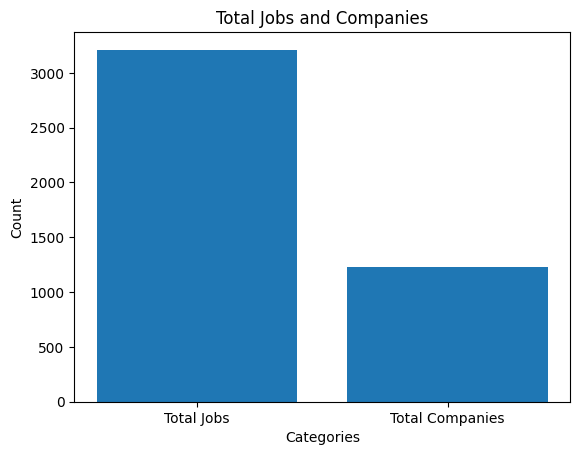

In [20]:
df['Job Title'].value_counts().sum()
print("\nThe total number of jobs available is: ", df['Job Title'].value_counts().sum())

df["Company"].nunique()
print("\nThe total number of Companies  is: ", df["Company"].nunique())
total_jobs = df['Job Title'].value_counts().sum()
total_companies = df["Company"].nunique()

# Creating a bar plot
plt.bar(['Total Jobs', 'Total Companies'], [total_jobs, total_companies])

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Total Jobs and Companies')

# Display the plot
plt.show()

##### Domain-wise Insights and Distribution: 

The total number of Industries is:  51


'The distribution of Jobs across various industries is shown below:'

,Industry,Total Job Count
21,Human Resources Management/Consultancy,777
23,Information Technology,757
15,Financial Services,327
46,Telecommunication,194
37,Others,109
36,Not Specified,96
17,Freight Forwarding/Delivery/Shipping,84
50,Wholesale / Retail,80
0,Accounting/Audit/Tax Services,62
8,Education,62


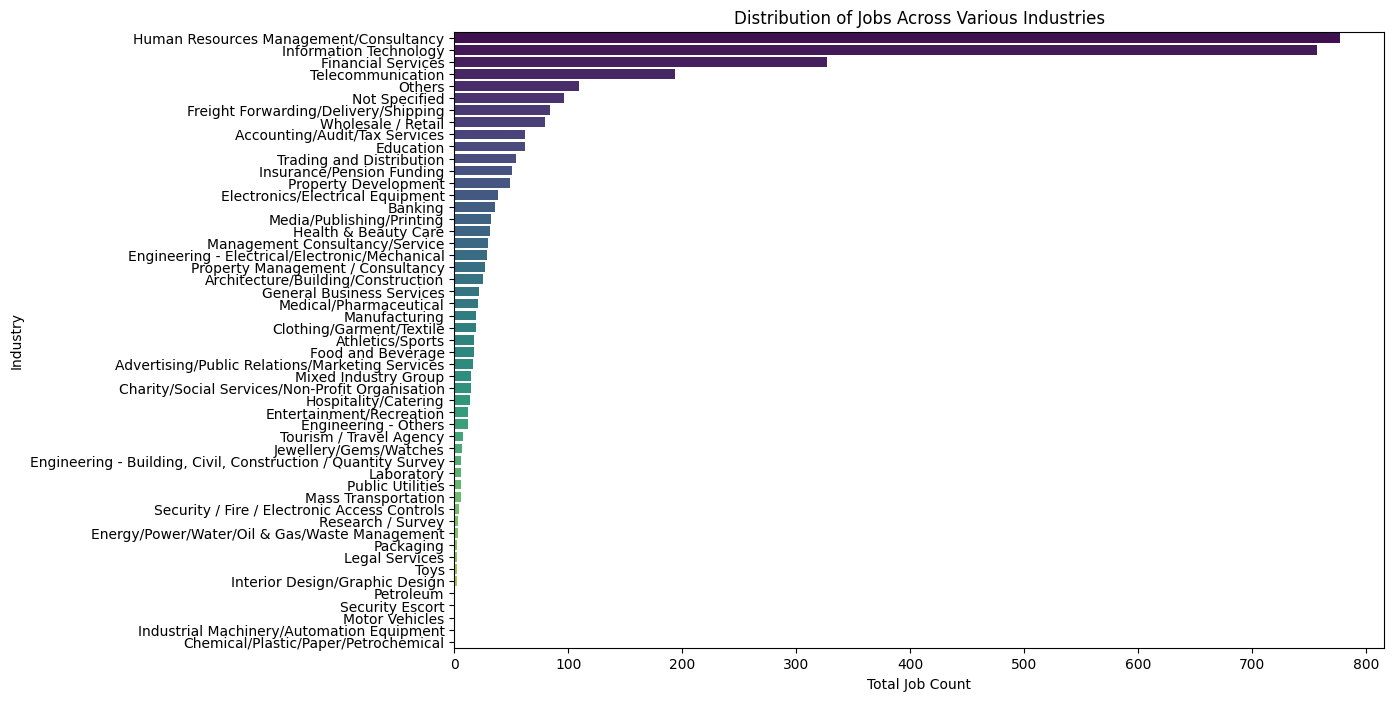

'Distribution of job types across various domains is:'

,Industry,Job Type,Job Count
80,Human Resources Management/Consultancy,"Full Time, Permanent",479
99,Information Technology,"Full Time, Permanent",351
89,Information Technology,Full Time,241
57,Financial Services,"Full Time, Permanent",219
179,Telecommunication,"Full Time, Permanent",129
...,...,...,...
97,Information Technology,"Full Time, Part Time, Permanent, Contract, Int...",1
96,Information Technology,"Full Time, Part Time, Permanent, Contract, Fre...",1
95,Information Technology,"Full Time, Part Time, Permanent, Contract",1
93,Information Technology,"Full Time, Part Time, Contract, Internship",1


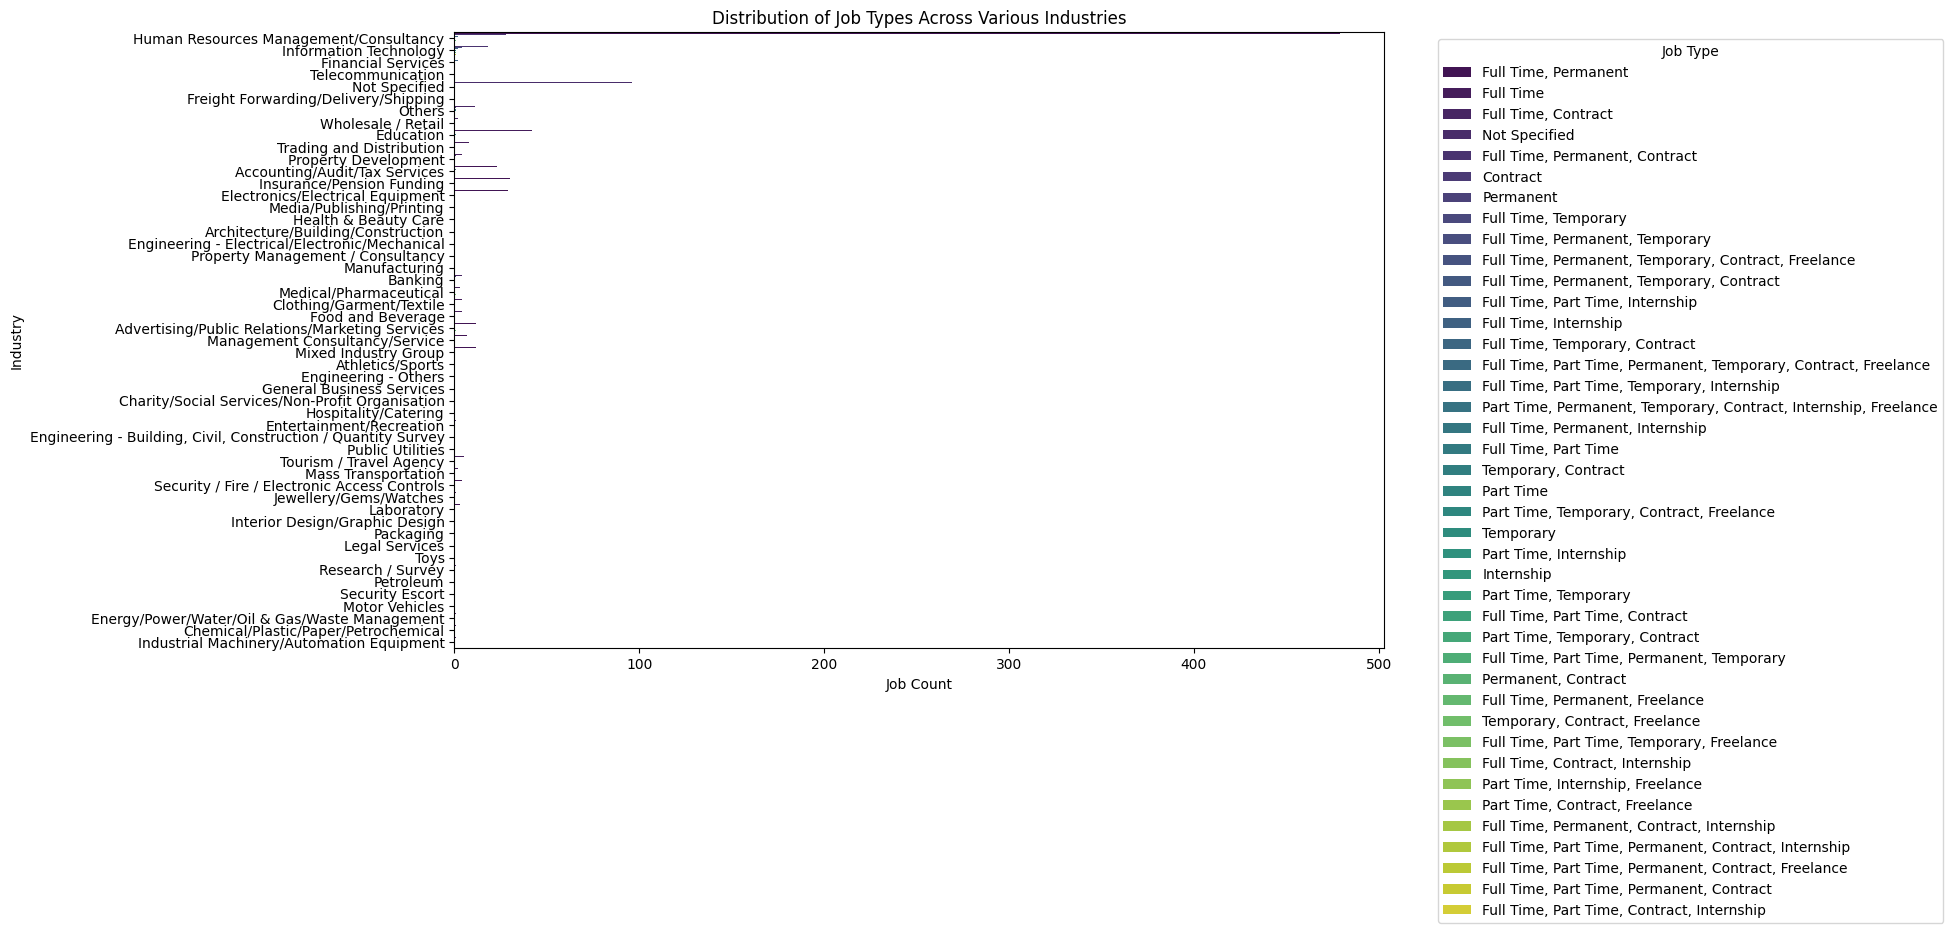

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total Number of Industries (Domains)
total_industries = df["Industry"].nunique()
print("The total number of Industries is: ", total_industries)

# Distribution of jobs across various domains (total count of jobs per industry)
industry_job_counts = df.groupby('Industry')['Job Title'].count().reset_index(name='Total Job Count')
industry_job_counts_sorted = industry_job_counts.sort_values(by='Total Job Count', ascending=False)

# Display the sorted result
display("The distribution of Jobs across various industries is shown below:", industry_job_counts_sorted)

# Visualization for Distribution of jobs across various domains
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Job Count', y='Industry', data=industry_job_counts_sorted, palette='viridis')
plt.title('Distribution of Jobs Across Various Industries')
plt.xlabel('Total Job Count')
plt.ylabel('Industry')
plt.show()

# Distribution of job types across various domains
industry_job_type_counts = df.groupby(['Industry', 'Job Type']).size().reset_index(name='Job Count')
industry_job_type_counts_sorted = industry_job_type_counts.sort_values(by='Job Count', ascending=False)

# Display the sorted result
display("Distribution of job types across various domains is:", industry_job_type_counts_sorted)

# Visualization for Distribution of job types across various domains
plt.figure(figsize=(12, 8))
sns.barplot(x='Job Count', y='Industry', hue='Job Type', data=industry_job_type_counts_sorted, palette='viridis')
plt.title('Distribution of Job Types Across Various Industries')
plt.xlabel('Job Count')
plt.ylabel('Industry')
plt.legend(title='Job Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




##### Career Levels and Distribution Analysis: 

'Percentage of Job Count for Different career Levels is: '

Entry     41.36
Middle    31.14
Senior    27.50
Name: Career Level, dtype: float64

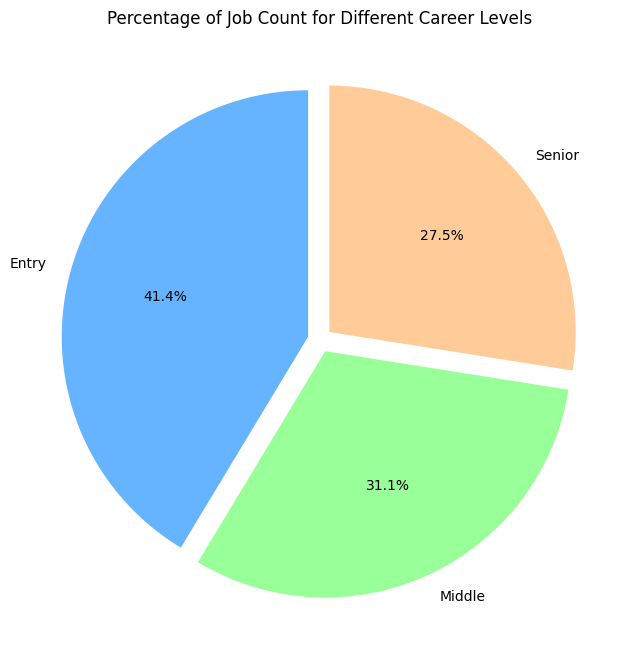

In [24]:
# Job Count for Different Career Levels
career_level_counts = df['Career Level'].value_counts()

# Calculate Percentage Distribution
percentage_by_career_level = (career_level_counts / career_level_counts.sum() * 100).round(2)

# Display the result
display ("Percentage of Job Count for Different career Levels is: ", percentage_by_career_level)


# Visualization for Percentage Distribution of Job Count for Different Career Levels
plt.figure(figsize=(8, 8))
percentage_by_career_level.plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=[0.05, 0.05, 0.05], colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Percentage of Job Count for Different Career Levels')
plt.ylabel('')
plt.show()


'Job Count for Different career Levels is: '

,Career Level,Total Job Count
0,Entry,1328
1,Middle,1000
2,Senior,883


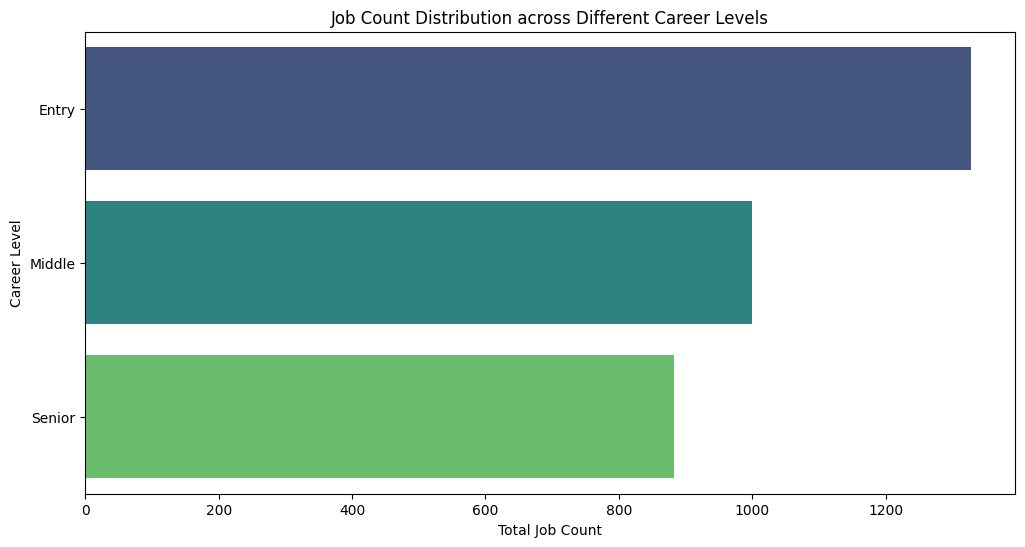

In [25]:

# Job Count for Different career Levels  
career_level_job_counts= df.groupby("Career Level")["Job Title"].count().reset_index(name="Total Job Count")   
career_level_job_counts_sorted= career_level_job_counts.sort_values(by="Total Job Count", ascending=False)
display("Job Count for Different career Levels is: "  ,career_level_job_counts_sorted)


# Visualization for Job Count Distribution across Different Career Levels
plt.figure(figsize=(12, 6))
sns.barplot(x="Total Job Count", y="Career Level", data=career_level_job_counts_sorted, palette="viridis")
plt.title('Job Count Distribution across Different Career Levels')
plt.xlabel('Total Job Count')
plt.ylabel('Career Level')
plt.show()


'Distribution of job types across various career level is: '

,Career Level,Job Type,Job Count
13,Entry,"Full Time, Permanent",735
44,Middle,"Full Time, Permanent",593
59,Senior,"Full Time, Permanent",494
1,Entry,Full Time,330
37,Middle,Full Time,237
...,...,...,...
42,Middle,"Full Time, Part Time, Permanent, Temporary",1
43,Middle,"Full Time, Part Time, Permanent, Temporary, Co...",1
18,Entry,"Full Time, Permanent, Temporary",1
47,Middle,"Full Time, Permanent, Temporary, Contract, Fre...",1


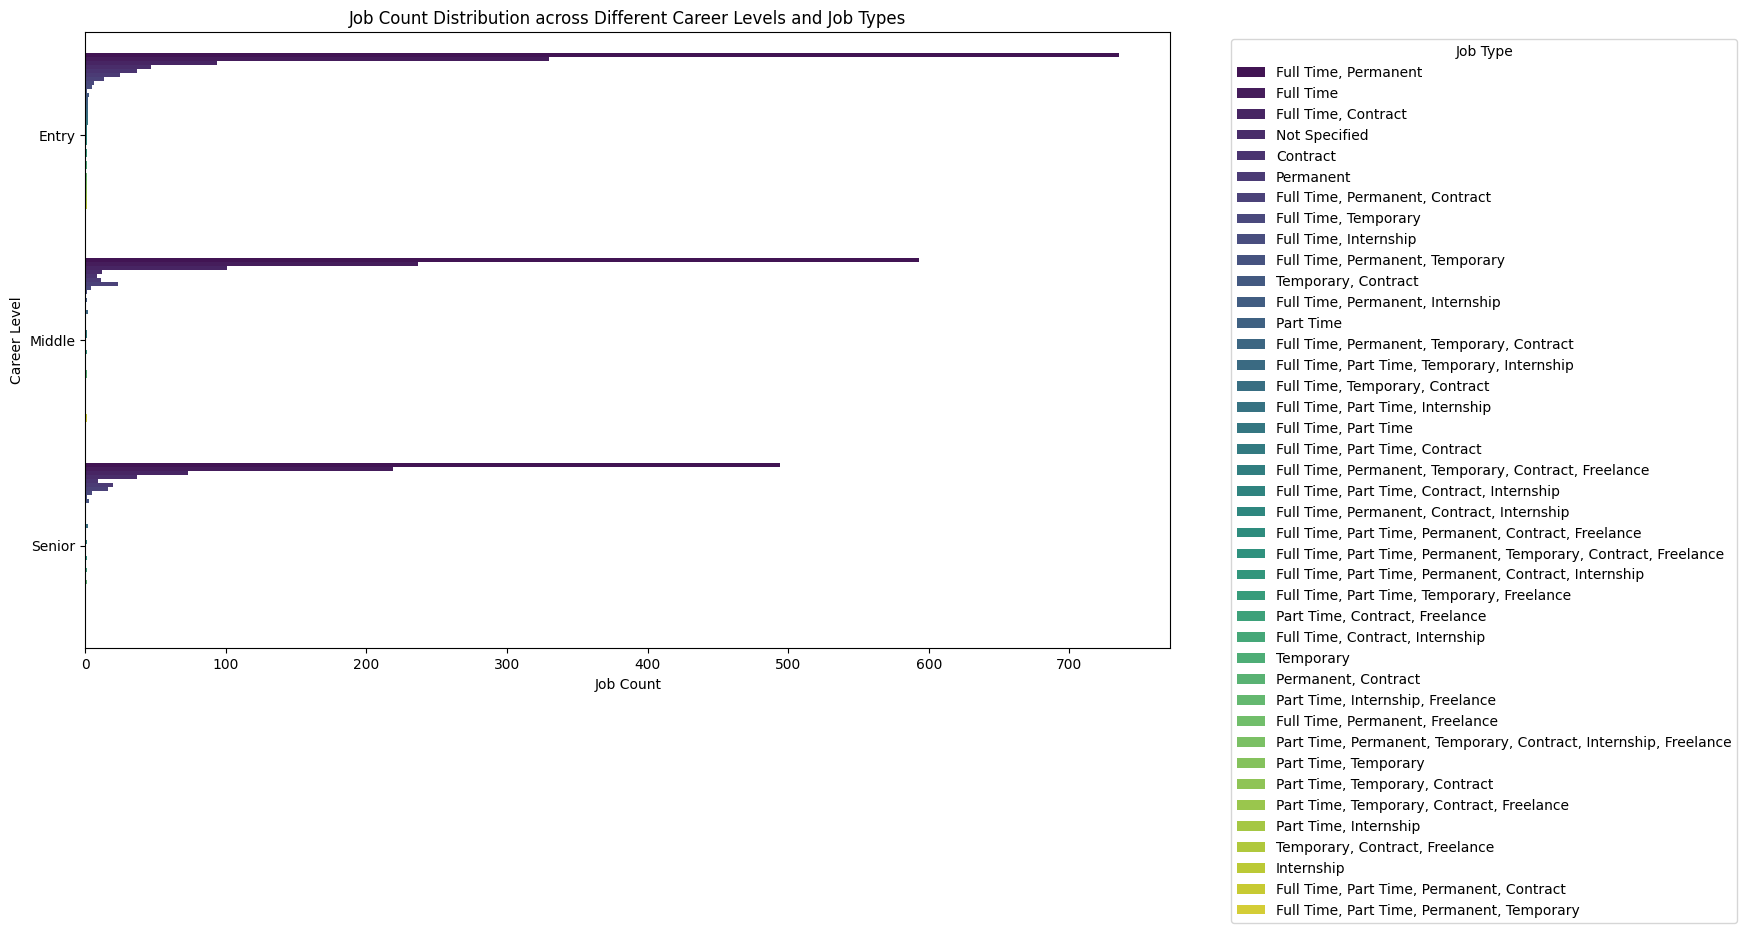

In [26]:
# getting job count for the career level and job types
career_level_job_type_counts= df.groupby(["Career Level", "Job Type"]).size().reset_index(name="Job Count")

# Sorting the resulting DataFrame by 'Job Count' in descending order
career_level_job_type_counts_sorted= career_level_job_type_counts.sort_values(by="Job Count", ascending=False)

# Printing the sorted DataFrame showing the count of jobs for each career level and job type
display("Distribution of job types across various career level is: "  ,career_level_job_type_counts_sorted)  
# Visualization for Job Count Distribution across Different Career Levels and Job Types
plt.figure(figsize=(14, 8))
sns.barplot(x="Job Count", y="Career Level", hue="Job Type", data=career_level_job_type_counts_sorted, palette="viridis")
plt.title('Job Count Distribution across Different Career Levels and Job Types')
plt.xlabel('Job Count')
plt.ylabel('Career Level')
plt.legend(title='Job Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


##### Job Role Distribution Analysis:

'Distribution of jobs across Analytics Field is: '

,Search Term,Total Job Counts
3,Data Scientist,2490
1,Data Analyst,502
0,Business Intelligence,137
2,Data Engineer,55
4,Machine Learning Engineer,27


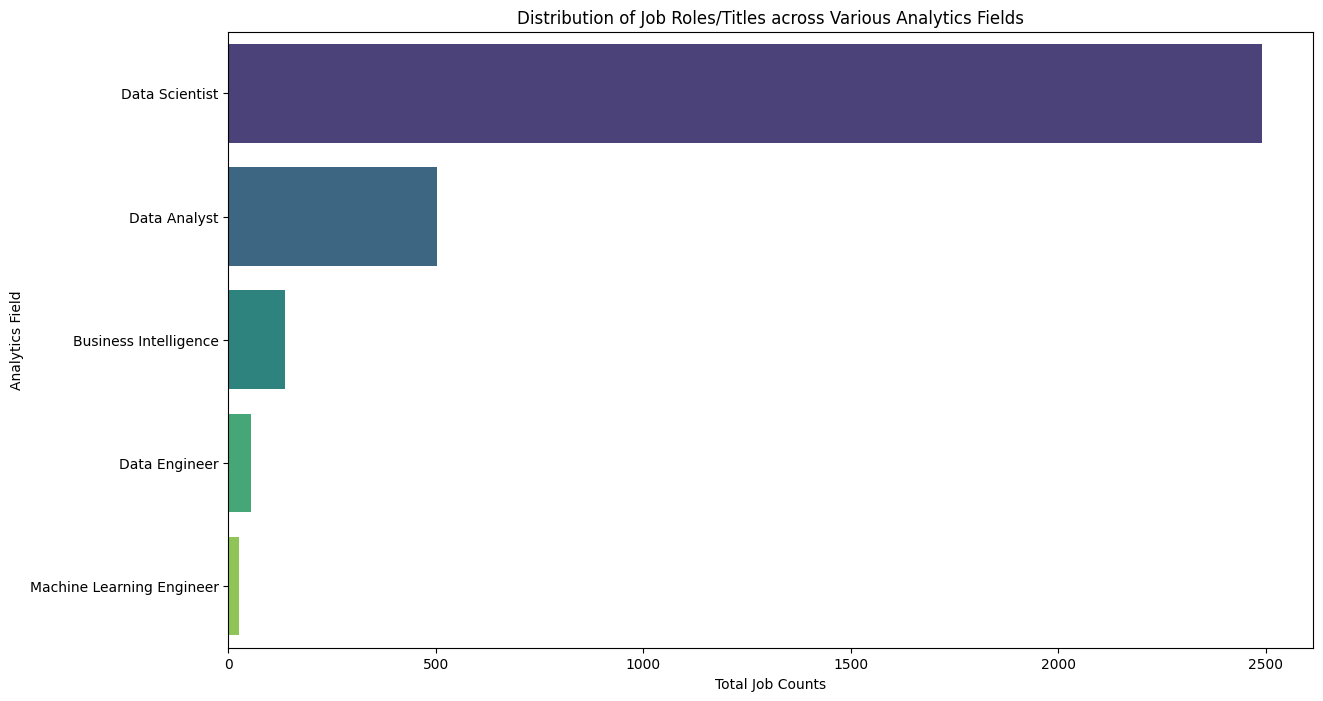

In [27]:
#  Distribution of job roles/titles across various analytics fields 
analytics_field_job_counts= df.groupby("Search Term")["Job Title"].count().reset_index(name= "Total Job Counts")

# sorting the resulting dataframe by job count in descending order 
analytics_field_job_counts_sorted=analytics_field_job_counts.sort_values(by="Total Job Counts", ascending=False)


# Printing the sorted DataFrame showing the count of jobs for each career level and job type
display( "Distribution of jobs across Analytics Field is: "  ,analytics_field_job_counts_sorted) 

# Visualization for Distribution of Job Roles/Titles across Various Analytics Fields
plt.figure(figsize=(14, 8))
sns.barplot(x="Total Job Counts", y="Search Term", data=analytics_field_job_counts_sorted, palette="viridis")
plt.title('Distribution of Job Roles/Titles across Various Analytics Fields')
plt.xlabel('Total Job Counts')
plt.ylabel('Analytics Field')
plt.show()


##### Minimum Required Qualifications

<Axes: >

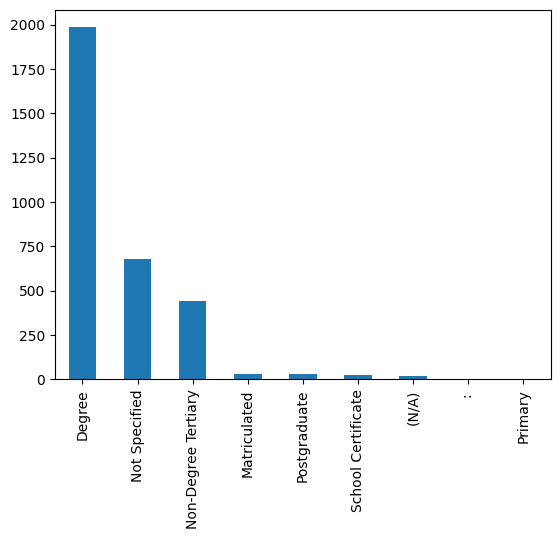

In [37]:
df['Qualification'].value_counts().plot.bar()

<Axes: >

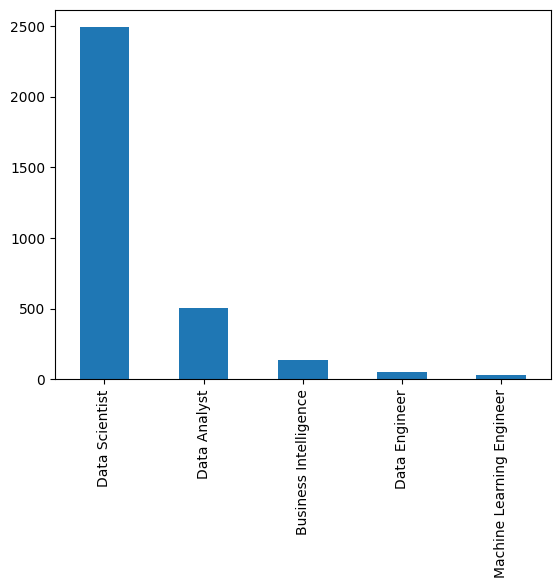

In [38]:
df['Search Term'].value_counts().plot.bar()

In [31]:
## Minimum required qualifications for Analytics Field 
# Grouping the DataFrame by 'Job Title' and getting the minimum qualification for each group
analytics_minimum_qualifications = df.groupby('Search Term')['Qualification'].min().reset_index(name='MinimumQualifications')

# Printing the result
display("Minimum required qualifications for job roles is : " "\n" ,analytics_minimum_qualifications) 

# # Create a subplot without axes
# fig, ax = plt.subplots(figsize=(10, 4)) 

# # Hide the axes
# ax.xaxis.set_visible(False) 
# ax.yaxis.set_visible(False) 

# # Create a table and add it to the subplot
# tbl = table(ax, analytics_minimum_qualifications, loc='center', colWidths=[0.2, 0.3])
# tbl.auto_set_font_size(False) 
# tbl.set_fontsize(10) 

# # Title for the table
# plt.title('Minimum Required Qualifications for Job Roles in Analytics Fields')

# # Display the table
# plt.show()

'Minimum required qualifications for job roles is : \n'

,Search Term,MinimumQualifications
0,Business Intelligence,(N/A)
1,Data Analyst,(N/A)
2,Data Engineer,(N/A)
3,Data Scientist,(N/A)
4,Machine Learning Engineer,Degree


In [32]:
## Minimum required qualifications for job roles  
# Grouping the DataFrame by 'Job Title' and getting the minimum qualification for each group
minimum_qualifications = df.groupby('Job Title')['Qualification'].min().reset_index(name='MinimumQualifications')

# Printing the result
display("Minimum required qualifications for job roles is : " "\n" ,minimum_qualifications) 



'Minimum required qualifications for job roles is : \n'

,Job Title,MinimumQualifications
0,( Senior) Analyst Programmer ( SAP ABAP) - in-...,Non-Degree Tertiary
1,(Analyst) Programmer (1-year renewable ct + fr...,Degree
2,(Assistant) Business Analyst - IT,Degree
3,(Assistant) Business Analyst / Marketing / Tec...,Degree
4,(Assistant) IT Officer (Native iOS/ Android De...,Non-Degree Tertiary
...,...,...
2784,iOS App Developer 25-40K,Not Specified
2785,iOS Application Developer,Degree
2786,iOS Developer,Not Specified
2787,二級機械工 (電子 / 電腦) Ref. no : C/HW-ENG/MEC2/09/21-AP1,Not Specified


##### Job Type Distribution Analysis:

In [33]:

# Job Count for Different Job Types 
job_type_job_counts= df.groupby("Job Type")["Job Title"].count().reset_index(name="Total Job Count")   
job_type_job_counts_sorted= job_type_job_counts.sort_values(by="Total Job Count", ascending=False)
display("Job Count for Different Job Types is: "  ,job_type_job_counts_sorted)

'Job Count for Different Job Types is: '

,Job Type,Total Job Count
16,"Full Time, Permanent",1822
1,Full Time,786
2,"Full Time, Contract",268
27,Not Specified,96
36,Permanent,56
0,Contract,54
17,"Full Time, Permanent, Contract",52
24,"Full Time, Temporary",15
4,"Full Time, Internship",7
25,"Full Time, Temporary, Contract",4


In [36]:
##  Distribution of job types across various analytics fields
analytics_field_job_type_counts = df.groupby(["Search Term", "Job Type"]).size().reset_index(name="Job Counts")

# Sorting the resulting dataframe by job count in descending order
analytics_field_job_type_counts_sorted = analytics_field_job_type_counts.sort_values(by="Job Counts", ascending=False)

# Display the result in a table format
table_format = tabulate(analytics_field_job_type_counts_sorted, headers='keys', tablefmt='pretty', showindex=False)
print("\n" "Distribution of job types across Analytics Field is:\n", table_format)
 
## Job Types for Different Job Titles 

job_types_job_titles_count= df.groupby(["Job Type", "Job Title"]).size().reset_index(name= "Job Counts")
job_types_job_titles_count_sorted= job_types_job_titles_count.sort_values(by="Job Counts", ascending=False) 
# print("\n" "The Job types for different job titles is: " "\n", job_types_job_titles_count_sorted)       
table_format = tabulate(job_types_job_titles_count_sorted, headers='keys', tablefmt='pretty', showindex=False)
print("\n" "The Job types for different job titles is:\n", table_format)                                                                            


# Job Count for Different Job Types 
df.groupby("Job Type")["Job Title"].count()                                                                                                             
                                                                                     


Distribution of job types across Analytics Field is:
 +---------------------------+------------------------------------------------------------------+------------+
|        Search Term        |                             Job Type                             | Job Counts |
+---------------------------+------------------------------------------------------------------+------------+
|      Data Scientist       |                       Full Time, Permanent                       |    1472    |
|      Data Scientist       |                            Full Time                             |    609     |
|       Data Analyst        |                       Full Time, Permanent                       |    268     |
|      Data Scientist       |                       Full Time, Contract                        |    207     |
|       Data Analyst        |                            Full Time                             |    130     |
|   Business Intelligence   |                       Full Time, Pe

Job Type
Contract                                                              54
Full Time                                                            786
Full Time, Contract                                                  268
Full Time, Contract, Internship                                        1
Full Time, Internship                                                  7
Full Time, Part Time                                                   2
Full Time, Part Time, Contract                                         2
Full Time, Part Time, Contract, Internship                             1
Full Time, Part Time, Internship                                       2
Full Time, Part Time, Permanent, Contract                              1
Full Time, Part Time, Permanent, Contract, Freelance                   1
Full Time, Part Time, Permanent, Contract, Internship                  1
Full Time, Part Time, Permanent, Temporary                             1
Full Time, Part Time, Permanent, Temporary

##### Company-wise Insights & Analysis:

In [180]:
## Companies with the highest number of job openings 
              
# Companies with the highest number of job openings
companies_job_openings = df.groupby('Company')['Job Title'].count().reset_index(name='Job Openings')
companies_job_openings_sorted = companies_job_openings.sort_values(by='Job Openings', ascending=False)

## Top 5 Companies and Total Jobs    
top_5_companies_jobs = companies_job_openings_sorted.head(5)
top_5_companies_jobs
  

,Company,Job Openings
558,IT Solutions Limited.,43
916,Robert Walters (HK),40
490,Hong Kong Applied Science and Technology Resea...,37
702,Manpower Services (Hong Kong) Limited,31
850,Pinpoint Asia Limited,29


## Insights & Findings 



##### Domain Wise Distribution Analysis & Insights:

-  The Total Number of Industries = 51 <br>

- The Industry with the highest number of jobs = Human Resources Management/Consultancy	(777) <br>



##### Career Level Distribution Analysis  & Insights:

Entry Career level have the most job openings and opportunities followed by Middle Career Level then Senior Career Levels and intuitively this makes sense <br>

| Career Level | Total Job Count |
|--------------|------------------|
| Entry        | 1328             |
| Middle       | 1000             |
| Senior       | 883              |

<br>

The minimum required qualification for respective analytics field is shown below:

| Search Term              | Minimum Qualifications |
|--------------------------|------------------------|
| Business Intelligence    | (N/A)                  |
| Data Analyst             | (N/A)                  |
| Data Engineer            | (N/A)                  |
| Data Scientist           | (N/A)                  |
| Machine Learning Engineer | Degree                |

<br>
<br>


The Percentage of Jobs across various career levels:

| Career Level | Percentage |
|--------------:|------------|
|         Entry |     41.36   |
|        Middle |     31.14   |
|        Senior |     27.50   |


<br>
<br>

##### Analytics Field, Job Role/Title &  Job Type  Distribution Analysis & Insights:


- The total number of Unique Jobs Available = 2789 <br>



- The total number of jobs available is:  3211 <br>
- The total number of Analytics field = 5 {Data Analyst,Business Intelligence, Data Scientist, Data Engineer, Machine Learning Engineer} <br>
<br>
<br>

 The total number of jobs available across the 5 analytics field :

| Analytics Field            | Counts |
|----------------------------|--------|
| Data Scientist             | 2490   |
| Data Analyst               | 502    |
| Business Intelligence      | 137    |
| Data Engineer              | 55     |
| Machine Learning Engineer  | 27     |

<br>
<br>





##### Company Wise Insights and Analysis 

- The total number of Companies providing jobs =  1232 <br>
<br>
The top Five Companies providing jobs are 

| Company                                                | Job Openings |
|--------------------------------------------------------|--------------|
| IT Solutions Limited.                                  | 43           |
| Robert Walters (HK)                                    | 40           |
| Hong Kong Applied Science and Technology Research Institute Company Limited | 37 |
| Manpower Services (Hong Kong) Limited                   | 31           |
| Pinpoint Asia Limited                                   | 29           |

In [40]:
# saving the data as a csv file
df.to_csv("./dsdata.csv")